In [1]:
# findout whether the person is diabetic or non diabetic

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mydata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/pima-indians-diabetes-2.csv")

In [4]:
mydata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# sometimes missing value is written in 0 form
mydata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
mydata.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
median1 =mydata["Preg"].median()
median1

3.0

In [8]:
median2 =mydata["Plas"].median()
median2

117.0

In [9]:
median3 =mydata["Pres"].median()
median3

72.0

In [10]:
median4 =mydata["skin"].median()
median4

23.0

In [11]:
median5 =mydata["test"].median()
median5

30.5

In [12]:
median6 =mydata["mass"].median()
median6

32.0

In [13]:
median7 =mydata["pedi"].median()
median7

0.3725

In [14]:
median8 =mydata["age"].median()
median8

29.0

In [15]:
median9 =mydata["class"].median()
median9

0.0

In [16]:
mydata["Preg"] = mydata["Preg"].replace(0, median1)
mydata["Plas"] = mydata["Plas"].replace(0, median2)
mydata["Pres"] = mydata["Pres"].replace(0, median3)
mydata["skin"] = mydata["skin"].replace(0, median4)
mydata["test"] = mydata["test"].replace(0, median5)
mydata["mass"] = mydata["mass"].replace(0, median6)
mydata["pedi"] = mydata["pedi"].replace(0, median7)
mydata["age"] = mydata["age"].replace(0, median8)
mydata["class"] = mydata["class"].replace(0, median9)  # ← this line is usually NOT needed
mydata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [17]:
# if we have otherthan 0 or anything for missing value than
# eg-
# mydata["skin"]=mydata["skin"].replace(to_replace="?", value=np.nan)
# mydata["skin"]=mydata["skin"].astype(float)
# mydata["skin"].replace(np.nan, median4, inplace=True)

# if it is in nan form then
# mydata["skin"] = mydata["skin"].replace({np.nan: median1})

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
# independent variables
x = mydata.drop("class", axis=1)
y = mydata[["class"]]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [21]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
reg_model.score(x_train, y_train)

0.7802607076350093

In [23]:
reg_model.score( x_test, y_test)

0.7835497835497836

In [24]:
# for displaying all rows or columns. we can use None at the place of 5 for all the rows or columns
# pd.set_option("display.max_rows", 5)

In [25]:
predictions=reg_model.predict(x_test)

In [26]:
from sklearn import metrics 
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.76      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



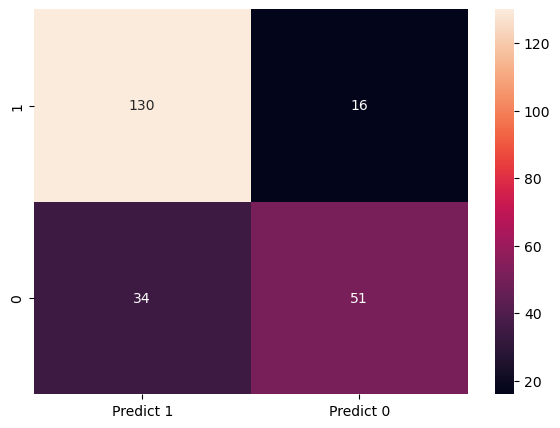

In [27]:
cm = metrics.confusion_matrix(y_test, predictions, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                   columns = [i for i in ["Predict 1","Predict 0"]])
plt.close('all')  # 🔄 Clear previous plots
plt.figure(figsize=(7,5))
(sns.heatmap(df_cm, annot=True, fmt="g"))
plt.show()

In [28]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [29]:
clf.score(x_train, y_train)

0.7746741154562383

In [30]:
clf.score(x_test, y_test)

0.7835497835497836

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=5, p=2) #p=1, manhattan and p=2 , euclidian

In [33]:
knn.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [34]:
knn.score(x_train, y_train)

0.7932960893854749

In [35]:
knn.score(x_test, y_test)

0.7575757575757576

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dcs=DecisionTreeClassifier(max_depth=4, criterion="entropy")

In [38]:
dcs.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
dcs.score(x_train, y_train)

0.7839851024208566

In [40]:
dcs.score(x_test, y_test)

0.7835497835497836